# 🛸 Adagrad - RMSProp - Adam

### Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import random

### Generate Data

In [2]:
data = np.linspace(0, 20, num=50)
np.random.shuffle(data)
data

array([18.36734694,  7.34693878, 19.18367347,  0.81632653, 20.        ,
       13.87755102, 11.83673469, 14.69387755,  1.2244898 ,  6.93877551,
       14.28571429,  7.75510204,  0.40816327,  3.67346939,  8.97959184,
        4.89795918,  1.63265306, 15.91836735, 10.20408163,  0.        ,
        8.57142857,  2.04081633, 11.02040816,  6.12244898, 11.42857143,
        9.79591837,  2.44897959,  4.48979592,  2.85714286,  3.26530612,
        5.30612245,  5.71428571, 17.95918367, 12.65306122, 10.6122449 ,
       13.46938776, 16.73469388, 12.24489796, 15.10204082,  8.16326531,
       17.55102041, 19.59183673, 13.06122449, 18.7755102 ,  4.08163265,
        9.3877551 , 16.32653061,  6.53061224, 15.51020408, 17.14285714])

In [3]:
x = data[:]
y = (-2 * x) + 1

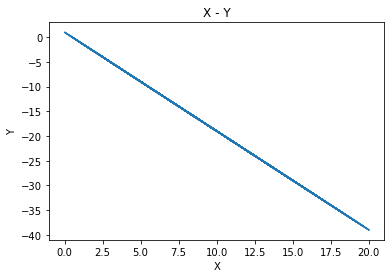

In [4]:
# Plot your data points
plt.plot(x,y)
plt.title('X - Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Adagrad

After 38 Iterations

updated_theta0: -1.6075148959879886
updated_theta1: -1.7391722727402834
loss: 1.2295393083254547

Y_Hat: 
[-33.45469232 -14.34614037 -34.87014062  -3.02255402 -36.28558891
 -25.66972671 -22.13110598 -27.08517501  -3.73027817 -13.63841622
 -26.37745086 -15.05386451  -2.31482988  -7.97662305 -17.17703695
 -10.09979549  -4.43800232 -29.20834745 -19.30020939  -1.60710573
 -16.46931281  -5.14572646 -20.71565769 -12.22296793 -21.42338183
 -18.59248525  -5.85345061  -9.39207134  -6.56117476  -7.2688989
 -10.80751963 -11.51524378 -32.74696818 -23.54655427 -20.00793354
 -24.96200257 -30.62379574 -22.83883013 -27.79289915 -15.76158866
 -32.03924403 -35.57786476 -24.25427842 -34.16241647  -8.68434719
 -17.8847611  -29.91607159 -12.93069207 -28.5006233  -31.33151988]

Y: 
[-35.73469388 -13.69387755 -37.36734694  -0.63265306 -39.
 -26.75510204 -22.67346939 -28.3877551   -1.44897959 -12.87755102
 -27.57142857 -14.51020408   0.18367347  -6.34693878 -16.95918367
  -8.79591837  -2.

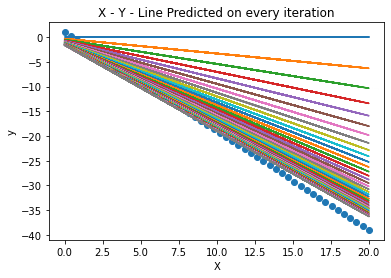

In [5]:
def Adagrad(x, y, alpha, epochs):
    
    epselon = 10**-8
    m = len(x) 
    all_loss   = []
    all_theta0 = []
    all_theta1 = []
    theta0, theta1 = 0, 0
    
    plot = plt.scatter(x, y)
    vt0, vt1 = 0, 0
    
    for i in range(epochs):
        # calculate y_hate using our hypothesis equation
        y_hat  = theta0 + theta1 * x
        
        # claculate loss        
        loss = sum( np.square(y_hat - y) ) / (2*m)
        
        # Add previous thetas and loss 
        all_loss.append(loss)
        all_theta0.append(theta0)
        all_theta1.append(theta1)
        
        # Gradient thetas
        g_theta0 = sum(y_hat - y) / m 
        g_theta1 = sum((y_hat - y) * x) / m
        
        # Update vts using the gradient
        vt0 = vt0 + np.square(g_theta0)
        vt1 = vt1 + np.square(g_theta1)
        
                
        # Update thetas based on previpus theta and adagrad formula "vt, epselon, and gradient"
        theta0 = theta0 - (alpha / ( np.sqrt(vt0) + epselon ) ) * g_theta0
        theta1 = theta1 - (alpha / ( np.sqrt(vt1) + epselon ) ) * g_theta1

        plot = plt.plot(x, y_hat)
        plt.title('X - Y - Line Predicted on every iteration')
        plt.xlabel('X')
        plt.ylabel('y')

        # Stopping using gradient
        if np.linalg.norm([g_theta0, g_theta1]) < 0.1:
            break
        
        # Stopping using loss
        if (i > 0) and (all_loss[i-1] - all_loss[i]) < 0.06:
            break
        
#         # Stopping using theta
#         if (i > 0) and ( ( np.linalg.norm([all_theta0[i], all_theta1[i]]) 
#                             - np.linalg.norm([all_theta0[i-1], all_theta1[i-1]])) < 0.00001):
#             break
    
    print(f"After {i+1} Iterations\n")
    print(f"updated_theta0: {theta0}")
    print(f"updated_theta1: {theta1}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")

    return (all_loss, y_hat, loss, all_theta0, all_theta1, i)

all_loss, y_hat, loss, all_theta0, all_theta1, num_iterations \
= Adagrad(x,y, 0.3, 250)


In [6]:
# Score
r2_score(y, y_hat)

0.9822801687917802

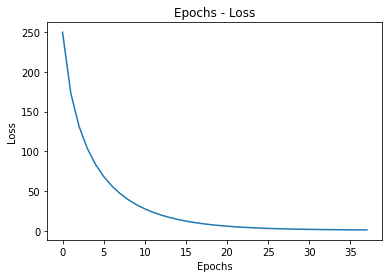

In [7]:
# epochs - loss
plt.plot(all_loss)
plt.title('Epochs - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

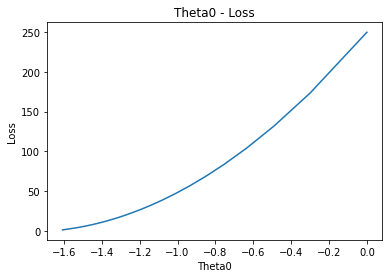

In [8]:
# Theta0 - loss
plt.plot(all_theta0, all_loss)
plt.title('Theta0 - Loss')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

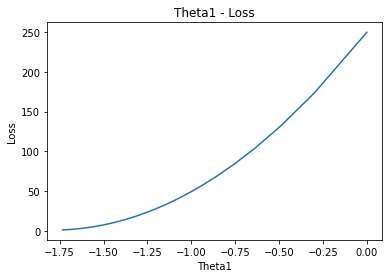

In [9]:
# Theta1 - loss
plt.plot(all_theta1, all_loss)
plt.title('Theta1 - Loss')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

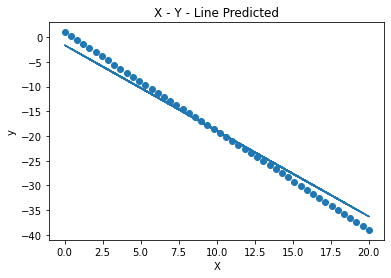

In [10]:
# Best Fit Line
plt.scatter(x,y)
plt.plot(x, y_hat)
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## RMSProp

After 44 Iterations

updated_theta0: -1.5712679909426417
updated_theta1: -1.800094570435666
loss: 0.8893755089661064

Y_Hat: 
[-34.52426084 -14.77421362 -35.9872273   -3.07048194 -37.45019376
 -26.47794531 -22.82052916 -27.94091177  -3.80196517 -14.04273039
 -27.20942854 -15.50569685  -2.33899871  -8.19086455 -17.70014654
 -10.38531424  -4.5334484  -30.13536146 -19.89459623  -1.60751548
 -16.96866331  -5.26493163 -21.35756269 -12.57976393 -22.08904592
 -19.163113    -5.99641486  -9.65383101  -6.72789809  -7.45938132
 -11.11679747 -11.8482807  -33.79277761 -24.28349562 -20.62607946
 -25.74646208 -31.59832792 -23.55201239 -28.672395   -16.23718008
 -33.06129438 -36.71871053 -25.01497885 -35.25574407  -8.92234778
 -18.43162977 -30.86684469 -13.31124716 -29.40387823 -32.32981115]

Y: 
[-35.73469388 -13.69387755 -37.36734694  -0.63265306 -39.
 -26.75510204 -22.67346939 -28.3877551   -1.44897959 -12.87755102
 -27.57142857 -14.51020408   0.18367347  -6.34693878 -16.95918367
  -8.79591837  -2.

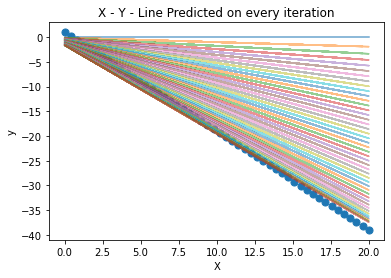

In [11]:
def RMSProp(x, y, alpha, beta, epochs):
    
    epselon = 10**-8
    m = len(x) 
    all_loss   = []
    all_theta0 = []
    all_theta1 = []
    theta0, theta1 = 0, 0
    vt0, vt1 = 0, 0

    plot = plt.scatter(x, y, s=50)

    for i in range(epochs):
        # calculate y_hate using our hypothesis equation
        y_hat  = theta0 + theta1 * x
        
        # claculate loss        
        loss = sum( np.square(y_hat - y) ) / (2*m)
        
        # Add previous thetas and loss 
        all_loss.append(loss)
        all_theta0.append(theta0)
        all_theta1.append(theta1)
        
        # Gradient thetas
        g_theta0 = sum(y_hat - y) / m 
        g_theta1 = sum((y_hat - y) * x) / m
        
        # Update vt based on beta
        vt0 = beta * vt0 + (1-beta) * np.square(g_theta0)
        vt1 = beta * vt1 + (1-beta) * np.square(g_theta1)
                
        # Update thetas based on previpus theta
        theta0 = theta0 - (alpha / ( np.sqrt(vt0) + epselon ) ) * g_theta0
        theta1 = theta1 - (alpha / ( np.sqrt(vt1) + epselon ) ) * g_theta1

        plot = plt.plot(x, y_hat, alpha=0.5)
        plt.title('X - Y - Line Predicted on every iteration')
        plt.xlabel('X')
        plt.ylabel('y')

        # Stopping using gradient
        if np.linalg.norm([g_theta0, g_theta1]) < 0.001:
            break
        
        # Stopping using loss
        if (i > 0) and (all_loss[i-1] - all_loss[i]) < 0.05:
            break
        
#         # Stopping using theta
#         if (i > 0) and ( ( np.linalg.norm([all_theta0[i], all_theta1[i]]) 
#                             - np.linalg.norm([all_theta0[i-1], all_theta1[i-1]])) < 0.00001):
#             break
    
    print(f"After {i+1} Iterations\n")
    print(f"updated_theta0: {theta0}")
    print(f"updated_theta1: {theta1}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")

    return (all_loss, y_hat, loss, all_theta0, all_theta1, i)

all_loss, y_hat, loss, all_theta0, all_theta1, num_iterations \
= RMSProp(x,y, 0.05, 0.7, 500)


In [12]:
# Score
r2_score(y, y_hat)

0.9871825294296062

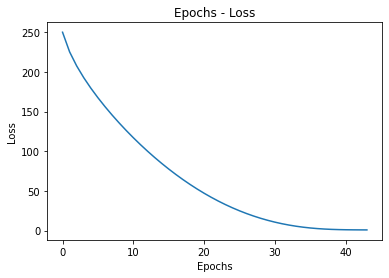

In [13]:
# epochs - loss
plt.plot(all_loss)
plt.title('Epochs - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

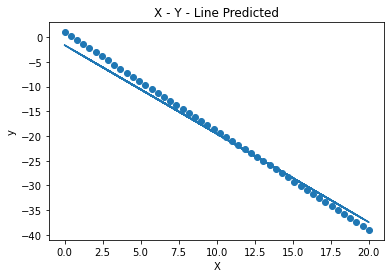

In [14]:
# Best Fit Line
plt.scatter(x,y)
plt.plot(x, y_hat)
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Adam

After 53 Iterations

updated_theta0: -1.7517798291535043
updated_theta1: -1.8129176629975206
loss: 0.9757951691021236

Y_Hat: 
[-34.88446522 -15.00161384 -36.35726902  -3.2191834  -37.83007283
 -26.78404429 -23.10203477 -28.25684809  -3.9555853  -14.26521194
 -27.52044619 -15.73801574  -2.48278149  -8.37399672 -17.94722145
 -10.58320242  -4.6919872  -30.4660538  -20.15642716  -1.74637959
 -17.21081955  -5.4283891  -21.62923097 -12.79240813 -22.36563287
 -19.42002526  -6.16479101  -9.84680052  -6.90119291  -7.63759481
 -11.31960433 -12.05600623 -34.14806331 -24.57483858 -20.89282906
 -26.04764238 -31.93885761 -23.83843667 -28.99324999 -16.47441765
 -33.41166141 -37.09367093 -25.31124048 -35.62086712  -9.11039862
 -18.68362336 -31.2024557  -13.52881004 -29.7296519  -32.67525951]

Y: 
[-35.73469388 -13.69387755 -37.36734694  -0.63265306 -39.
 -26.75510204 -22.67346939 -28.3877551   -1.44897959 -12.87755102
 -27.57142857 -14.51020408   0.18367347  -6.34693878 -16.95918367
  -8.79591837  -2

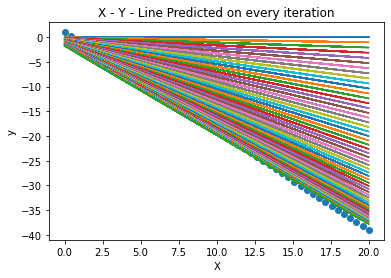

In [15]:
def Adam(x, y, alpha, beta1, beta2, epochs):
    
    epselon = 10**-8
    m = len(x) 
    all_loss   = []
    all_theta0 = []
    all_theta1 = []
    theta0, theta1 = 0, 0
    beta1 = 0.9
    beta2 = 0.999
    last_vt0, last_vt1, last_mt0, last_mt1 = 0, 0, 0, 0

    plot = plt.scatter(x, y)


    for i in range(epochs):
        # calculate y_hate using our hypothesis equation
        y_hat  = theta0 + theta1 * x
        
        # claculate loss        
        loss = sum( np.square(y_hat - y) ) /(2*m)
        
        # Add previous thetas and loss 
        all_loss.append(loss)
        all_theta0.append(theta0)
        all_theta1.append(theta1)
        
        # Gradient thetas
        g_theta0 = sum(y_hat - y) / m
        g_theta1 = sum((y_hat - y) * x) / m
        
        # Update mt based on beta 1 
        mt0 = beta1 * last_mt0 + (1-beta1) * (g_theta0)
        mt1 = beta1 * last_mt1 + (1-beta1) * (g_theta1)    
        
        # Update vt based on beta2 -- square
        vt0 = beta2 * last_vt0 + (1-beta2) * np.square(g_theta0)
        vt1 = beta2 * last_vt1 + (1-beta2) * np.square(g_theta1)
        
        # Bias Correction 
        mt0_corrected = mt0 / (1-beta1**(i+1))
        mt1_corrected = mt1 / (1-beta1**(i+1))
        vt0_corrected = vt0 / (1-beta2**(i+1))
        vt1_corrected = vt1 / (1-beta2**(i+1))

        # Update thetas based on vts and mts
        theta0 = theta0 - ( alpha * (mt0_corrected / ( np.sqrt(vt0_corrected) + epselon) ) )
        theta1 = theta1 - ( alpha * (mt1_corrected / ( np.sqrt(vt1_corrected) + epselon) ) )

        last_vt0, last_vt1 = vt0, vt1
        last_mt0, last_mt1 = mt0, mt1

        plot = plt.plot(x, y_hat)
        plt.title('X - Y - Line Predicted on every iteration')
        plt.xlabel('X')
        plt.ylabel('y')

        # Stopping using gradient
        if np.linalg.norm([g_theta0, g_theta1]) < 0.001:
            break
        
        # Stopping using loss
        if (i > 0) and (all_loss[i-1] - all_loss[i]) < 0.001:
            break
        
#         # Stopping using theta
#         if (i > 0) and ( ( np.linalg.norm([all_theta0[i], all_theta1[i]]) 
#                             - np.linalg.norm([all_theta0[i-1], all_theta1[i-1]])) < 0.00001):
#             break
    
    print(f"After {i+1} Iterations\n")
    print(f"updated_theta0: {theta0}")
    print(f"updated_theta1: {theta1}")
    print(f"loss: {loss}\n")
    print(f"Y_Hat: \n{y_hat}\n")
    print(f"Y: \n{y}")

    return (all_loss, y_hat, loss, all_theta0, all_theta1, i)

all_loss, y_hat, loss, all_theta0, all_theta1, num_iterations \
= Adam(x,y, 0.05, 0.9, 0.999, 1000)


In [16]:
# Score
r2_score(y, y_hat)

0.9859370696217635

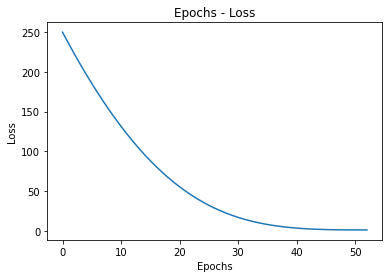

In [17]:
# epochs - loss
plt.plot(all_loss)
plt.title('Epochs - Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

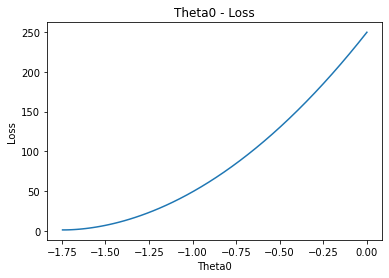

In [18]:
# Theta0 - loss
plt.plot(all_theta0, all_loss)
plt.title('Theta0 - Loss')
plt.xlabel('Theta0')
plt.ylabel('Loss')
plt.show()

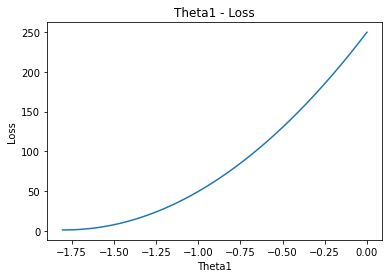

In [19]:
# Theta1 - loss
plt.plot(all_theta1, all_loss)
plt.title('Theta1 - Loss')
plt.xlabel('Theta1')
plt.ylabel('Loss')
plt.show()

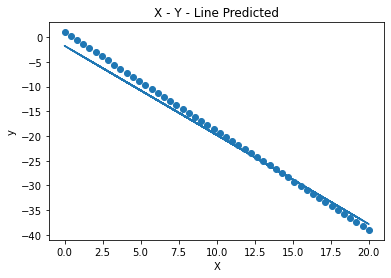

In [20]:
# Best Fit Line
plt.scatter(x,y)
plt.plot(x, y_hat)
plt.title('X - Y - Line Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()